# Proyecto Support Vector Machine - Soluciones

¡Bienvenido a su proyecto Support Vector Machine! Simplemente siga el cuaderno y las instrucciones a continuación. ¡Analizaremos el famoso conjunto de datos de iris!

## Los datos
Para esta serie de conferencias, utilizaremos el famoso [Iris flower data set](http://en.wikipedia.org/wiki/Iris_flower_data_set).

El conjunto de datos de flores de Iris o el conjunto de datos de Fisher's Iris es un conjunto de datos multivariados introducido por Sir Ronald Fisher en 1936 como un ejemplo de análisis discriminante.

El conjunto de datos consta de 50 muestras de cada una de las tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor), es decir, 150 muestras en total. De cada muestra se midieron cuatro características: el largo y el ancho de los sépalos y pétalos, en centímetros.

Aquí hay una imagen de los tres tipos diferentes de iris:

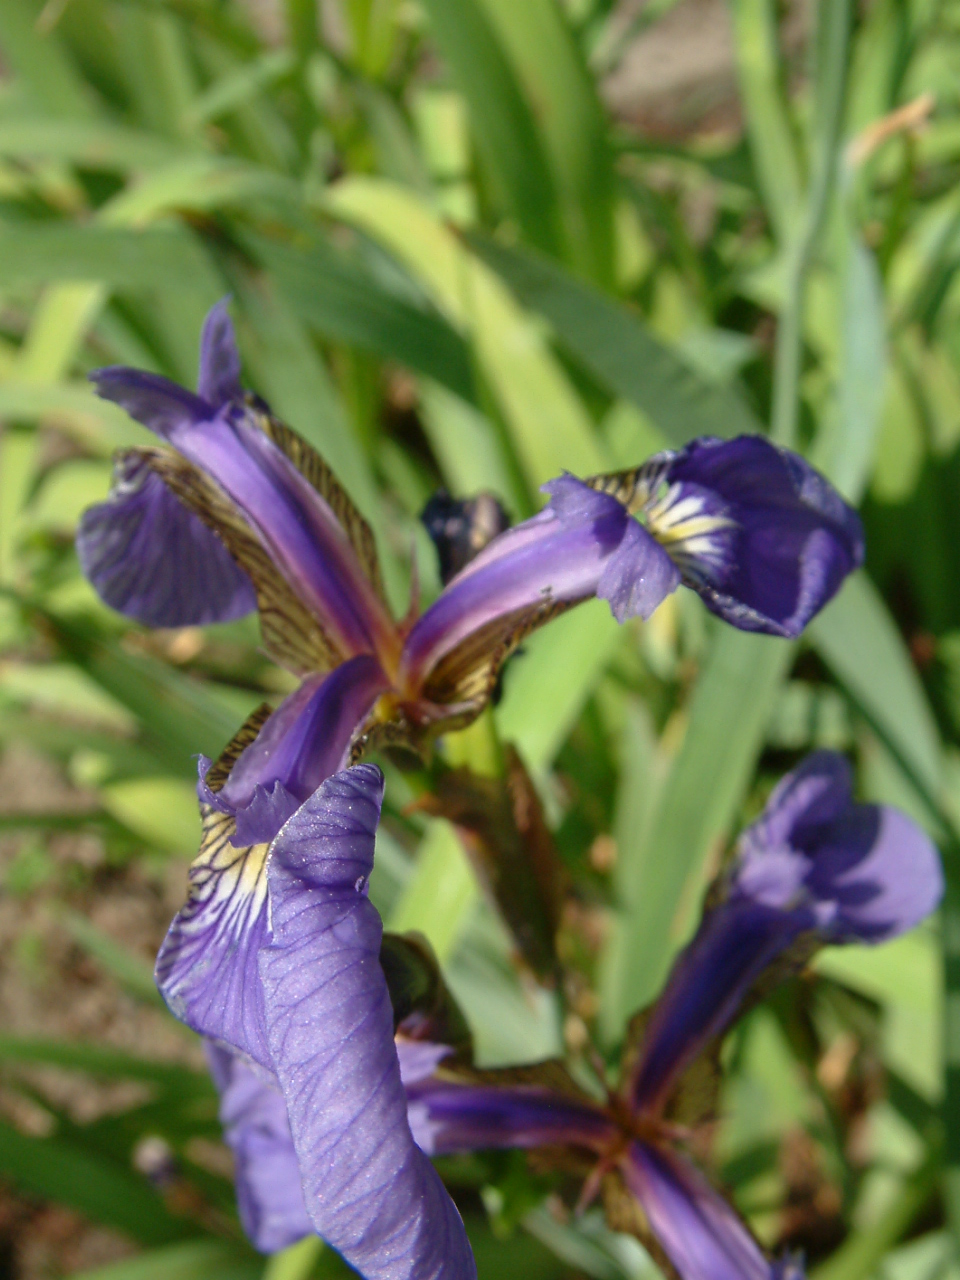

In [1]:
# La Iris Setosa
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg'
Image(url,width=300, height=300)

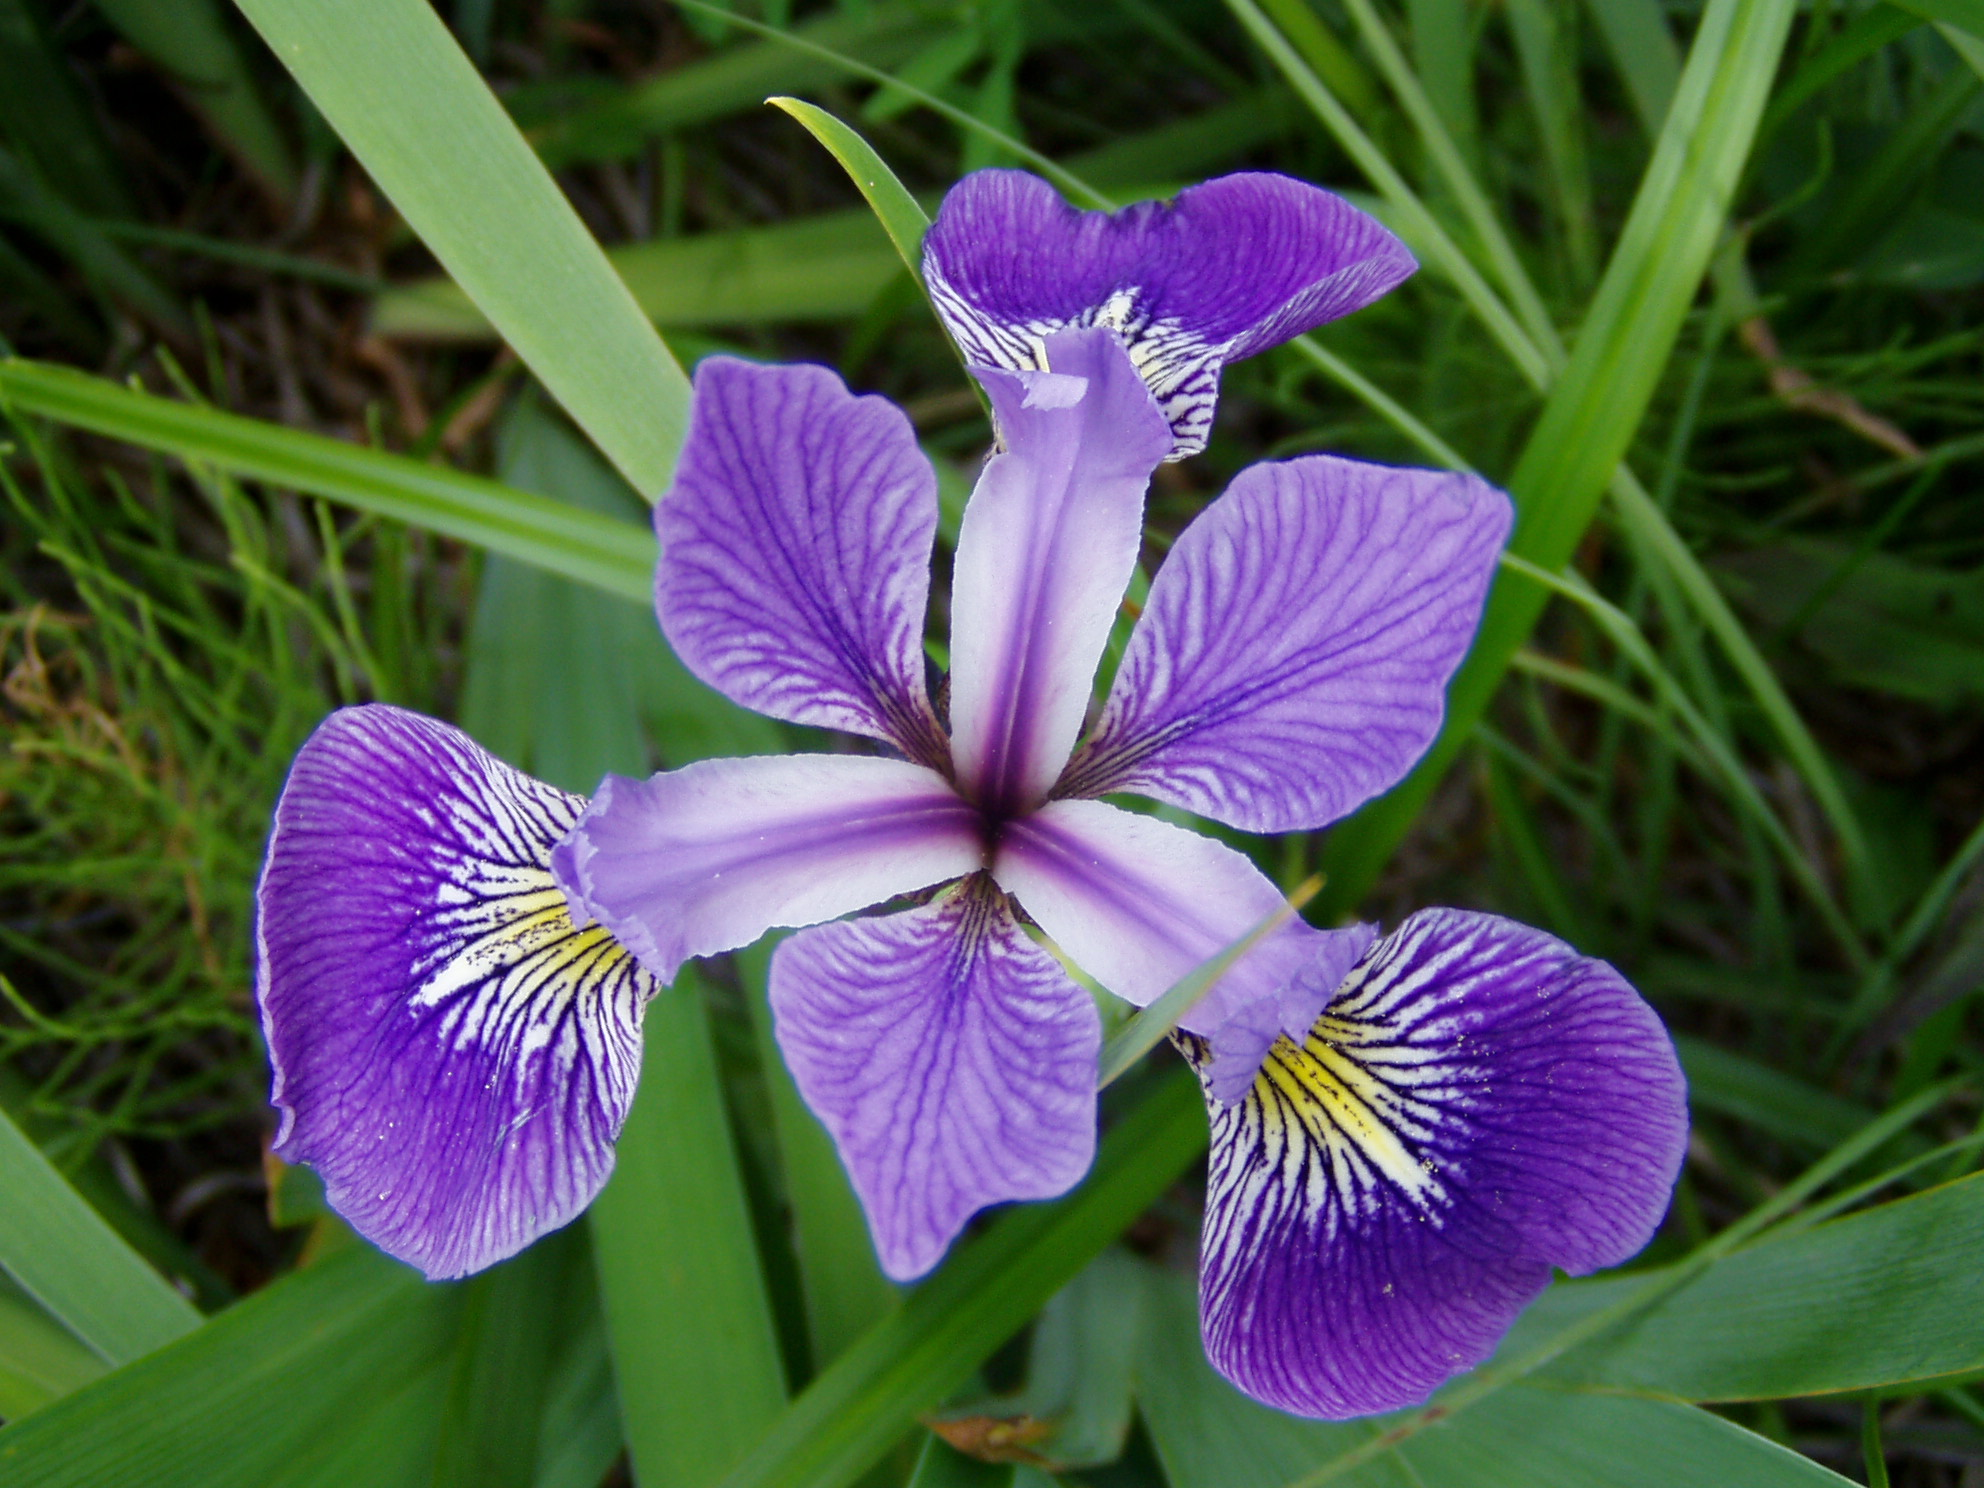

In [2]:
# La Iris Versicolor
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg'
Image(url,width=300, height=300)

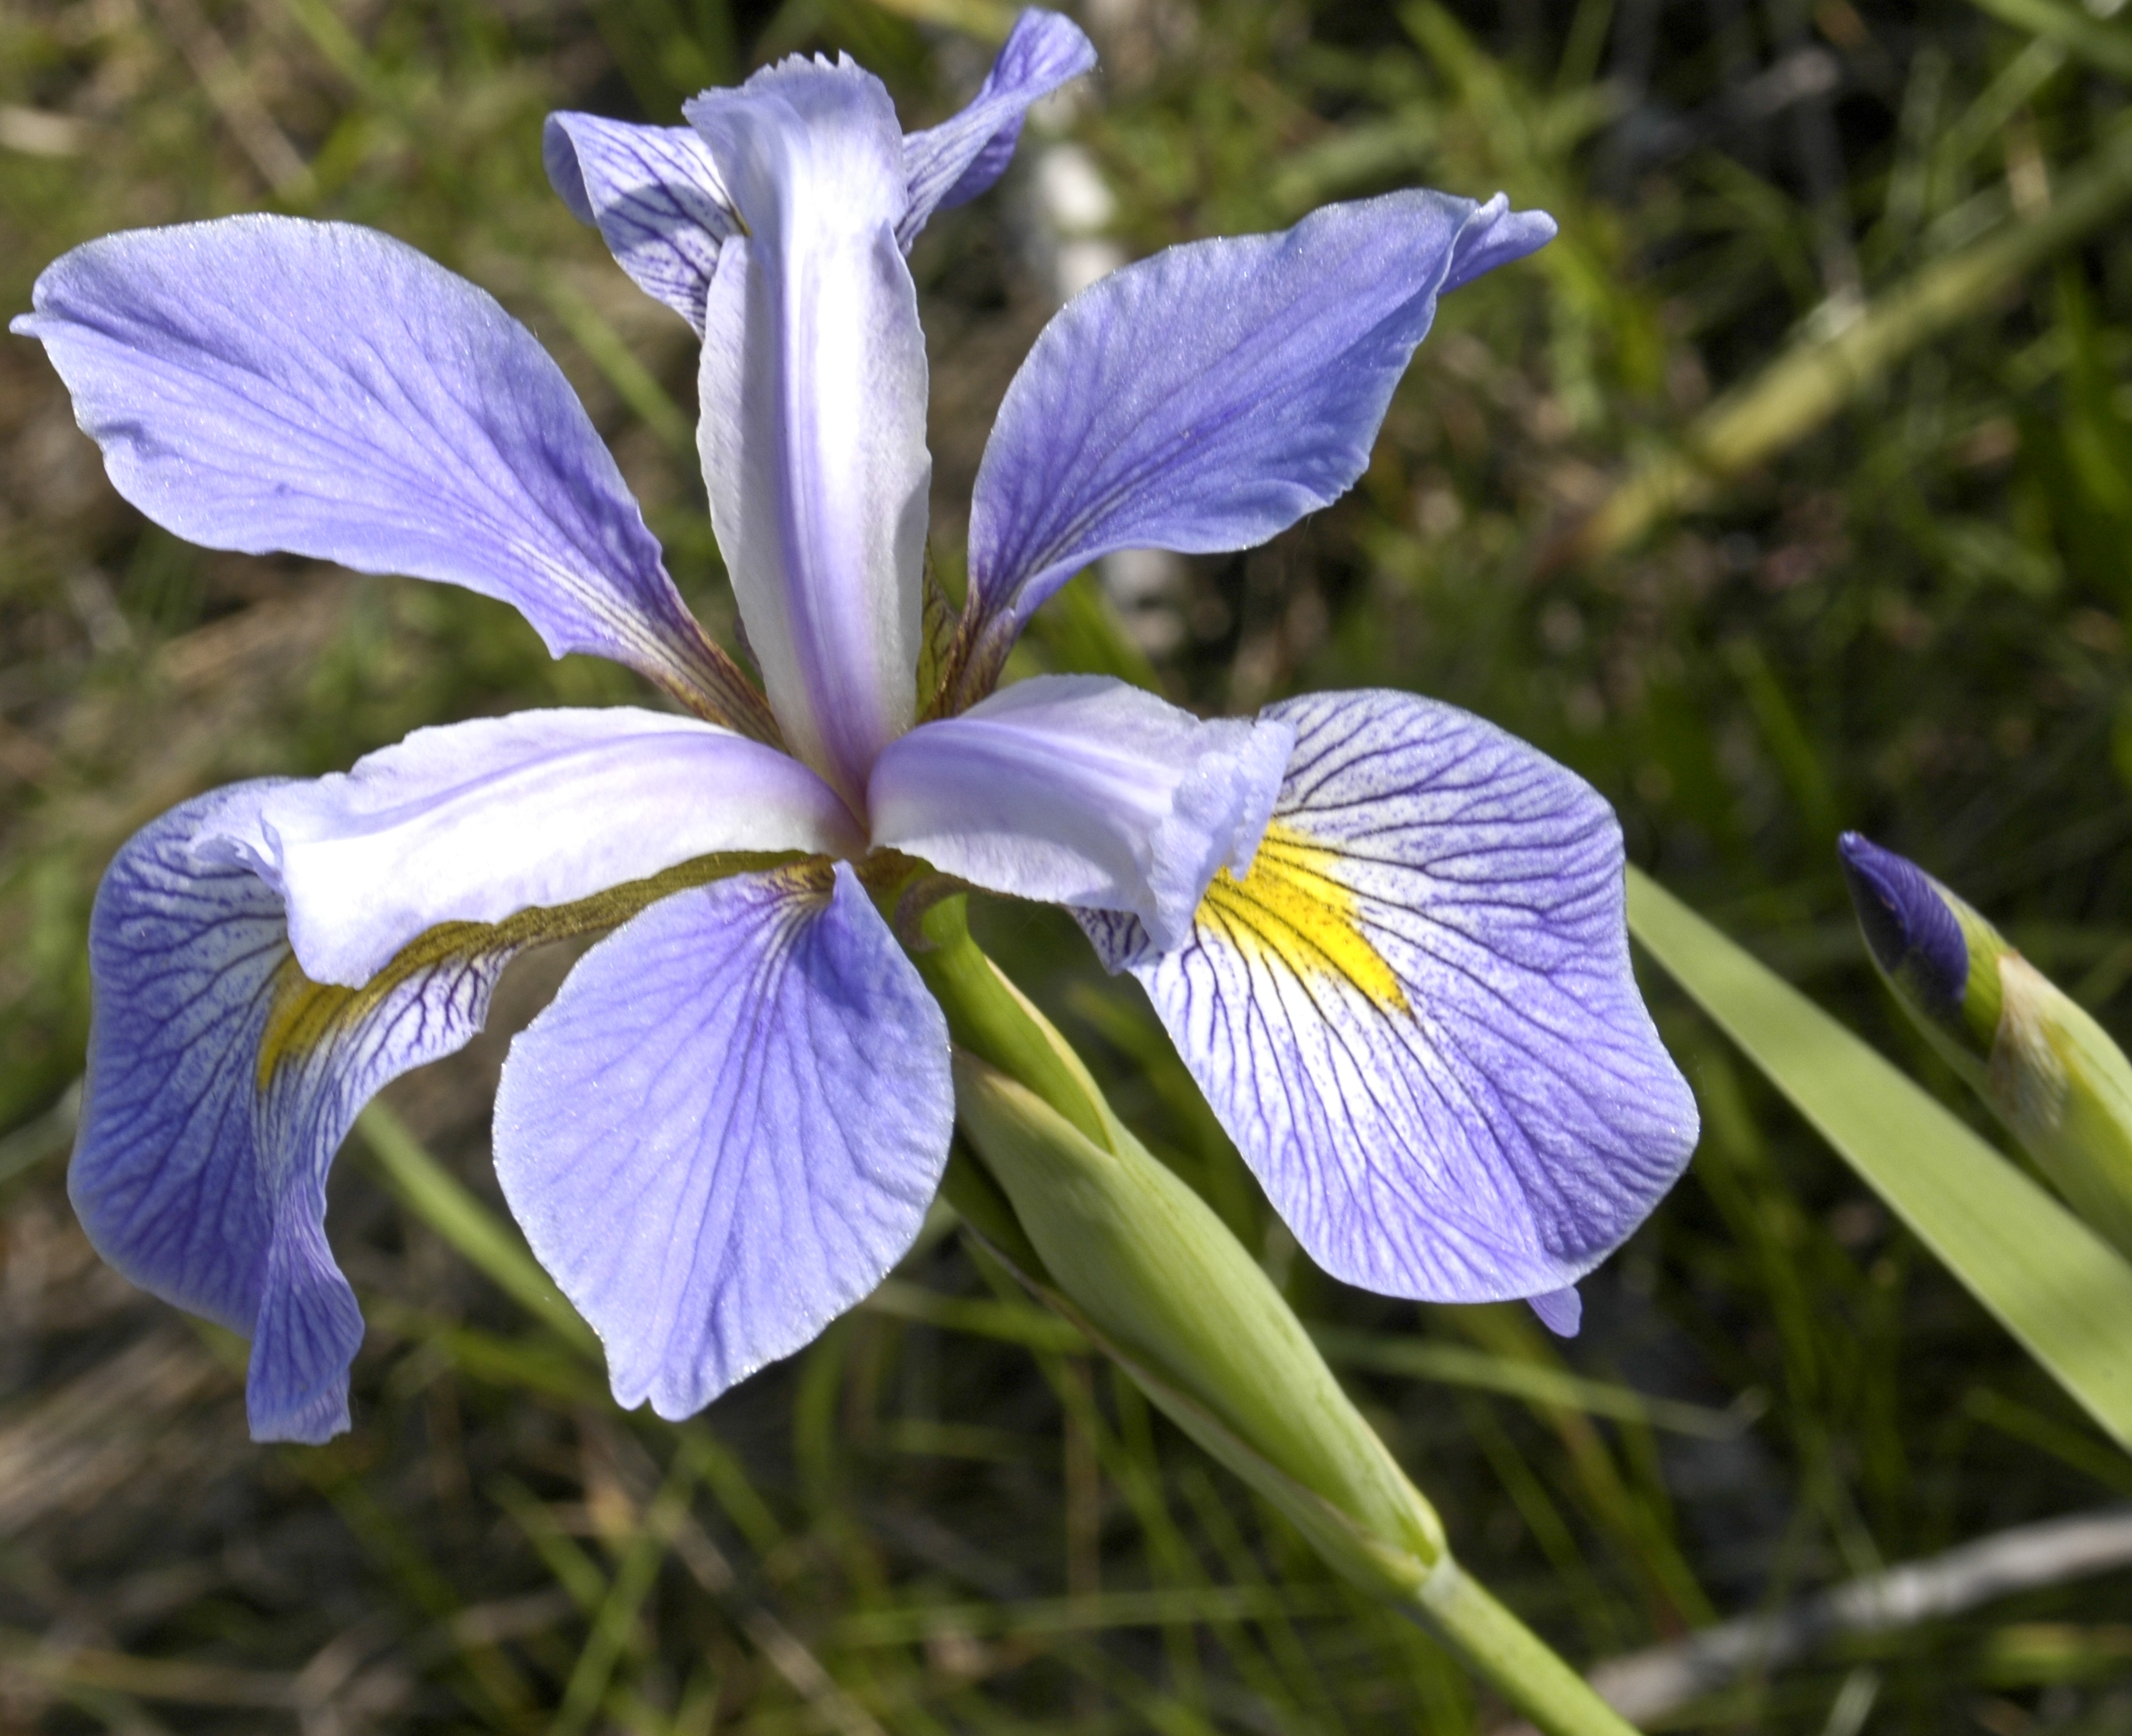

In [4]:
# La Iris Virginica
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg'
Image(url,width=300, height=300)

El conjunto de datos de iris contiene mediciones de 150 flores de iris de tres especies diferentes.

Las tres clases del conjunto de datos de Iris:

    Iris-setosa (n = 50)
    Iris-versicolor (n = 50)
    Iris-virginica (n = 50)

Las cuatro características del conjunto de datos Iris:

    longitud del sépalo en cm
    ancho del sépalo en cm
    longitud del pétalo en cm
    ancho del pétalo en cm

## Obtén los datos

**Use seaborn para obtener los datos del iris usando: iris = sns.load_dataset ('iris')**

In [5]:
import seaborn as sns
iris = sns.load_dataset('iris')

¡Visualicemos los datos y comencemos!

## Análisis exploratorio de datos

¡Es hora de poner a prueba sus habilidades de visualización de datos! Intente recrear los siguientes gráficos, asegúrese de importar las librerías que necesitará.

**Importe algunas librerías que crea que necesitará.**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Cree un pairplot del conjunto de datos. ¿Qué especie de flor parece ser la más diferenciable?**

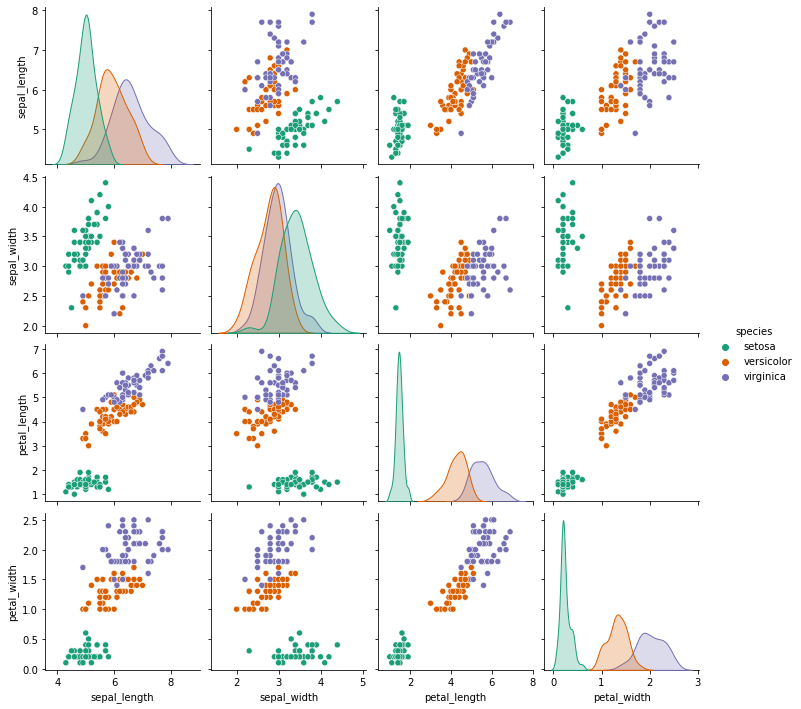

In [7]:
# Setosa es la más diferenciable. 
sns.pairplot(iris,hue='species',palette='Dark2')

**Cree un gráfico kde de sepal_length versus sepal_width para la especie de flor setosa.**

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

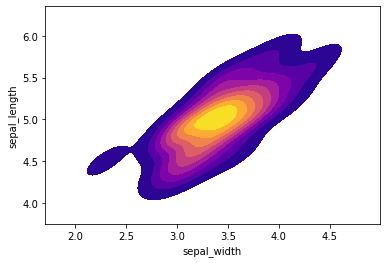

In [8]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot( x= 'sepal_width', y = 'sepal_length',
                 cmap="plasma", shade=True, thresh=0.05, data=setosa)

# División entrenamiento y prueba

**Divida sus datos en un conjunto de entrenamiento y un conjunto de prueba.**

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = iris.drop('species',axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Entrenar a un modelo

Ahora es el momento de entrenar un clasificador de máquinas de vectores de soporte.

**Llame al modelo SVC() de sklearn y ajuste el modelo a los datos de entrenamiento.**

In [11]:
from sklearn.svm import SVC

In [12]:
svc_model = SVC()

In [13]:
svc_model.fit(X_train,y_train)

SVC()

## Evaluación del modelo

**Ahora obtenga predicciones del modelo y cree una matriz de confusión y un reporte de clasificación.**

In [14]:
predictions = svc_model.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(confusion_matrix(y_test,predictions))

[[21  0  0]
 [ 0 10  0]
 [ 0  2 12]]


In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        21
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.86      0.92        14

    accuracy                           0.96        45
   macro avg       0.94      0.95      0.94        45
weighted avg       0.96      0.96      0.96        45



¡Deberías haber notado que tu modelo es bastante bueno! Veamos si podemos ajustar los parámetros para intentar mejorar aún más (poco probable, y probablemente estaría satisfecho con estos resultados en la realidad porque el conjunto de datos es bastante pequeño, pero solo quiero que practiques el uso de GridSearch).

## Práctica de Gridsearch

**Importar GridsearchCV desde SciKit Learn.**

In [18]:
from sklearn.model_selection import GridSearchCV

**Cree un diccionario llamado param_grid y complete algunos parámetros para C y gamma.**

In [19]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

**Cree un objeto GridSearchCV y ajústelo a los datos de entrenamiento.**

In [20]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

**Ahora tome ese modelo de cuadrícula y cree algunas predicciones usando el conjunto de prueba y cree el reporte de clasificación y la matriz de confusión para ellos. ¿Pudiste mejorar?**

In [21]:
grid_predictions = grid.predict(X_test)

In [22]:
print(confusion_matrix(y_test,grid_predictions))

[[21  0  0]
 [ 0 10  0]
 [ 0  1 13]]


In [23]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        21
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        21
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.86      0.92        14

    accuracy                           0.96        45
   macro avg       0.94      0.95      0.94        45
weighted avg       0.96      0.96      0.96        45



Deberías haber hecho aproximadamente lo mismo o exactamente lo mismo, esto tiene sentido, básicamente hay un solo punto que es demasiado ruidoso para agarrar, lo cual tiene sentido, no queremos tener un modelo de overfit que pueda agarrar eso.